# WEB SCRAPING AND SENTIMENT ANALYSIS
# & 
# Perform emotion mining

## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

import warnings
warnings.filterwarnings('ignore')

## READING DATA

In [6]:
bt='https://www.amazon.in/'
ul='https://www.amazon.in/Apple-MacBook-Air-13-3-inch-MQD32HN/product-reviews/B073Q5R6VR/ref=cm_cr_getr_d_paging_btm_next_30?ie=UTF8&reviewerType=all_reviews'

In [7]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [8]:
%%time
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

CPU times: total: 24.9 s
Wall time: 2min 52s


In [9]:
len(cust_name)

2282

In [10]:
len(review_title)

2282

In [11]:
len(review_content)

2282

In [12]:
len(rate)

2282

In [13]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [14]:
df = pd.DataFrame()

In [15]:
df.head(10)

""


In [16]:
df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [18]:
df.to_csv(r'D:\Excel_R\Data Science\Assignments:fill.csv',index = True)

In [21]:
data = pd.read_csv("D:\Excel_R\Data Science\Assignments:fill.csv",index_col=[0])

In [22]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [23]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [24]:
data['Rating']

0       5.0
1       1.0
2       5.0
3       5.0
4       1.0
       ... 
2277    5.0
2278    5.0
2279    3.0
2280    5.0
2281    5.0
Name: Rating, Length: 2282, dtype: object

In [25]:
data['Rating'].value_counts(normalize=True)*100

5.0    67.090272
1.0    14.022787
4.0    12.839614
3.0     3.242770
2.0     2.804557
Name: Rating, dtype: float64

In [26]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
1.0,320,320,320
2.0,64,64,64
3.0,73,74,74
4.0,293,293,293
5.0,1531,1531,1530


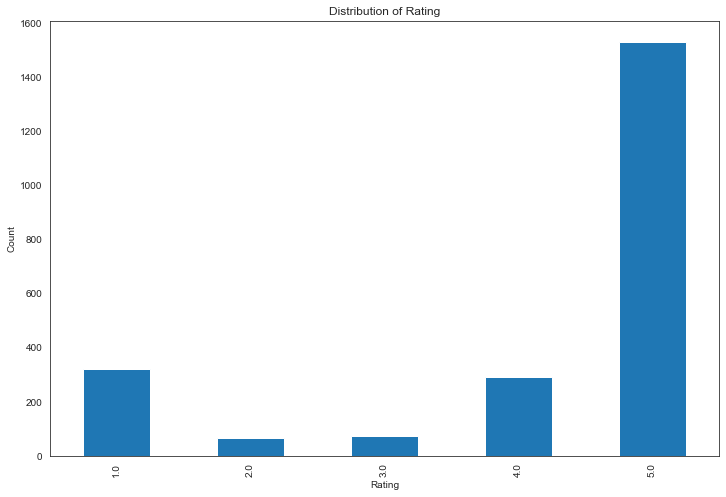

In [105]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

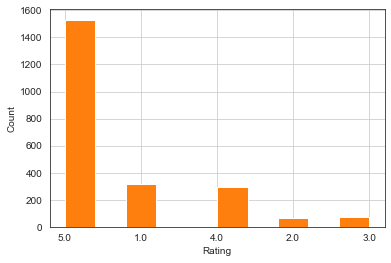

In [104]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [29]:
data.iloc[:,[3]]

,Reviews
0,It's amazing..... battery last around 10 -12 h...
1,We buy macbook's expecting that it will lasts ...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,"Bought this product recently on 5 April, was w..."
...,...
2277,Good
2278,👍👍👍
2279,Is the storage 128 gb only is sufficient for l...
2280,Good value


In [30]:
Reviews=data.iloc[:,[3]]

In [31]:
Reviews.shape

(2282, 1)

In [32]:
Reviews.describe()

,Reviews
count,2281
unique,2099
top,Good
freq,37


In [33]:
Reviews.dtypes

Reviews    object
dtype: object

In [34]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Customer Name","Review Title"],axis=1,inplace=True)

data.head()

,Rating,Reviews
0,5.0,It's amazing..... battery last around 10 -12 h...
1,1.0,We buy macbook's expecting that it will lasts ...
2,5.0,Best Laptop under 60k. If you don't want any a...
3,5.0,Pros:1. Light weight and super fast response t...
4,1.0,"Bought this product recently on 5 April, was w..."


In [35]:
data.Reviews.isna().sum()

1

In [36]:
data['Reviews']=data['Reviews'].fillna(" ")

In [37]:
#Checking null entries
data.Reviews.isna().sum()

0

## Text Pre-processing

In [38]:
#Converting all review into Lowercase
data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [39]:
#removing punctuation from review
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [40]:
# Remove Numbers from review
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

In [41]:
# removing all stopwords
from nltk.corpus import stopwords

In [42]:
stop_words=stopwords.words('english')

In [43]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [44]:
data.head(5)

,Rating,Reviews
0,5.0,amazing battery last around hrsbest laptop stu...
1,1.0,buy macbooks expecting lasts least years case ...
2,5.0,best laptop k dont want accounting softwares l...
3,5.0,pros light weight super fast response time hig...
4,1.0,bought product recently april working perfectl...


In [45]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [46]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [47]:
data['Reviews'].head()

0    amazing battery last around hrsbest laptop stu...
1    buy macbooks expecting last least year case sa...
2    best laptop  dont want accounting software lik...
3    pro light weight super fast response time high...
4    bought product recently april working perfectl...
Name: Reviews, dtype: object

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df

,aaaaa,ab,abgn,abgnac,abide,ability,abit,able,aboutrest,abovea,...,yr,yucksoftware,zenbook,zero,zeroed,zk,zone,zoom,zooming,zoomskype
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

  (0, 910)	0.48595345191739
  (0, 5130)	0.3418516280693097
  (0, 2866)	0.17562596566023975
  (0, 2437)	0.5628641336303163
  (0, 329)	0.3159937911889572
  (0, 2908)	0.2995533478867576
  (0, 489)	0.20626535491616774
  (0, 173)	0.2592229026834033
  (1, 4365)	0.23005976048822632
  (1, 1398)	0.30341692556906297
  (1, 3782)	0.21060404984941247
  (1, 2732)	0.21464911537333284
  (1, 5086)	0.16249997588601148
  (1, 5787)	0.17292690207519665
  (1, 1502)	0.15125839389144907
  (1, 638)	0.14297037212314812
  (1, 4440)	0.4115618111632417
  (1, 1118)	0.3448664082535357
  (1, 4641)	0.23448010900631974
  (1, 771)	0.24219629107048607
  (1, 6020)	0.13326935056722375
  (1, 2935)	0.2368894632612151
  (1, 1789)	0.27586974987190976
  (1, 3109)	0.25975568508829794
  (1, 709)	0.12893584913089717
  :	:
  (2281, 2107)	0.25505066037584645
  (2281, 3915)	0.2421883622311089
  (2281, 1353)	0.23306241646468875
  (2281, 4472)	0.22020011831995118
  (2281, 4149)	0.16914499702539806
  (2281, 1495)	0.1608221911300868
  (2

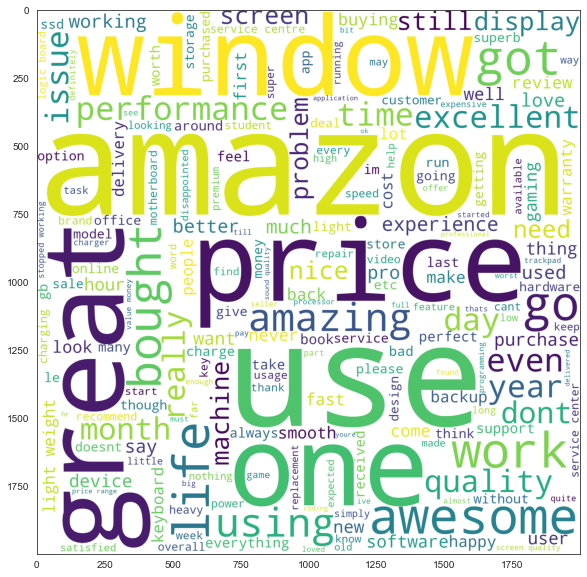

In [103]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)
plt.show()

In [53]:
### Removing Punctuation as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [54]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

0    amazing battery last around hrsbest laptop stu...
1    buy macbooks expecting last least year case sa...
2    best laptop  dont want accounting software lik...
3    pro light weight super fast response time high...
4    bought product recently april working perfectl...
Name: Reviews, dtype: object

In [55]:
### Common word removal

In [56]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

product    864
laptop     859
apple      704
good       634
macbook    464
mac        420
battery    393
air        341
best       336
buy        332
dtype: int64

In [57]:
### Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [58]:
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()

0            amazing last around hrsbest student coder
1    macbooks expecting last least year case saying...
2    dont want accounting software like tally busy ...
3    pro light weight super fast response time high...
4    bought recently april working perfectly fine d...
Name: Reviews, dtype: object

In [59]:
###  Rare words removal
### Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [60]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq

grammar            1
kfirst             1
protectionabout    1
productdesign      1
carved             1
glow               1
cherry             1
geasture           1
ventillation       1
jus                1
dtype: int64

In [61]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0            amazing last around hrsbest student cover
1    macbooks expecting last least year case saying...
2    dont want accounting software like tall busy g...
3    pro light weight super fast response time high...
4    bought recently april working perfectly fine d...
5    upset checked day back december didn start luc...
6    reason star of defective piece sound quality s...
7    hi think thousand time buying one calm night m...
8    never purchase bought start giving problem mon...
9    bought working fine till last month suddenly s...
Name: Reviews, dtype: object

In [62]:
# Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our reviews into a blob and then converted them into a series of words.

In [63]:
TextBlob(data['Reviews'][0]).words

WordList(['amazing', 'last', 'around', 'hrsbest', 'student', 'coder'])

In [64]:
TextBlob(data['Reviews'][1]).words

WordList(['macbooks', 'expecting', 'last', 'least', 'year', 'case', 'saying', 'cost', 'repair', 'bought', 'dont', 'want', 'repair', 'still', 'ive', 'pay', 'diagnostic', 'cost', 'recommended'])

In [65]:
### Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [66]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


0               amaz last around hrsbest student coder
1    macbook expect last least year case say cost r...
2    dont want account softwar like talli busi go b...
3    pro light weight super fast respons time highl...
4    bought recent april work perfectli fine day ap...
5    upset check day back decemb didnt start luckil...
6    reason star ot defect piec sound qualiti start...
7    hi think thousand time buy one calm night cudd...
8    never purchas bought start give problem month ...
9    bought work fine till last month suddenli stop...
Name: Reviews, dtype: object

In [67]:
### Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [68]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()

0            amazing last around hrsbest student coder
1    macbooks expecting last least year case saying...
2    dont want accounting software like tally busy ...
3    pro light weight super fast response time high...
4    bought recently april working perfectly fine d...
Name: Reviews, dtype: object

In [69]:
### Advance Text Processing
### Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.
# 
#  
### N-grams
### N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.
# 
### Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.


In [70]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['amazing', 'last']),
 WordList(['last', 'around']),
 WordList(['around', 'hrsbest']),
 WordList(['hrsbest', 'student']),
 WordList(['student', 'coder'])]

In [71]:
### Term frequency
### Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.
 
### Therefore, we can generalize term frequency as:
 
### TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [72]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,repair,2.0
1,cost,5.0
2,bought,5.0
3,diagnostic,1.0
4,pay,3.0
...,...,...
263,care,1.0
264,charging,1.0
265,stopped,1.0
266,suddenly,1.0


In [73]:
### Inverse Document Frequency
### The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.
### 
### Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.
### 
### IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [74]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [75]:
tf1

,words,tf,idf
0,repair,2.0,3.781564
1,cost,5.0,3.041460
2,bought,5.0,2.591144
3,diagnostic,1.0,6.346513
4,pay,3.0,3.861607
...,...,...,...
263,care,1.0,3.655270
264,charging,1.0,4.043928
265,stopped,1.0,3.995138
266,suddenly,1.0,4.842436


In [76]:
### The more the value of IDF, the more unique is the word.

### Term Frequency – Inverse Document Frequency (TF-IDF)
### TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [77]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,repair,2.0,3.781564,7.563128
1,cost,5.0,3.041460,15.207298
2,bought,5.0,2.591144,12.955720
3,diagnostic,1.0,6.346513,6.346513
4,pay,3.0,3.861607,11.584820
...,...,...,...,...
263,care,1.0,3.655270,3.655270
264,charging,1.0,4.043928,4.043928
265,stopped,1.0,3.995138,3.995138
266,suddenly,1.0,4.842436,4.842436


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])
data_vect

<2282x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 22168 stored elements in Compressed Sparse Row format>

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<2282x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 25460 stored elements in Compressed Sparse Row format>

In [82]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0     (0.30000000000000004, 0.48333333333333334)
1                   (-0.15, 0.23333333333333334)
2      (0.18055555555555555, 0.4601851851851852)
3       (0.3518253968253968, 0.6041269841269842)
4                    (0.11333333333333333, 0.36)
5    (-0.08833333333333333, 0.43166666666666664)
6       (0.4055555555555556, 0.5666666666666668)
7                (-0.09843749999999998, 0.54375)
8                 (0.017500000000000005, 0.5175)
9     (-0.12188552188552187, 0.3968013468013468)
Name: Reviews, dtype: object

In [83]:
### Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

,Reviews,sentiment
0,amazing last around hrsbest student coder,0.300000
1,macbooks expecting last least year case saying...,-0.150000
2,dont want accounting software like tally busy ...,0.180556
3,pro light weight super fast response time high...,0.351825
4,bought recently april working perfectly fine d...,0.113333


In [85]:
### Word Embeddings
# Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.
 
# Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

In [88]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [89]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'negative-words.txt'
word2vec_output_file = 'positive-words.txtpd.read_csv'

In [ ]:
import collections
from collections import Counter
import nltk

In [92]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,amazing last around hrsbest student coder,0.300000
1,macbooks expecting last least year case saying...,-0.150000
2,dont want accounting software like tally busy ...,0.180556
3,pro light weight super fast response time high...,0.351825
4,bought recently april working perfectly fine d...,0.113333


In [93]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,sentiment,polarity
0,5.0,amazing last around hrsbest student coder,0.300000,0.300000
2,5.0,dont want accounting software like tally busy ...,0.180556,0.180556
3,5.0,pro light weight super fast response time high...,0.351825,0.351825
4,1.0,bought recently april working perfectly fine d...,0.113333,0.113333
6,1.0,reason star ot defective piece sound quality s...,0.405556,0.405556


In [94]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [96]:
sent_type(data['polarity'])

positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
neutral
positive
neutral
negative
positive
negative
negative
neutral
neutral
positive
positive
positive
positive
negative
negative
positive
neutral
negative
positive
positive
negative
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
neutral
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
negative
neutral
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative

In [97]:
data["category"]=data['polarity']

In [98]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [99]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating         object
Reviews        object
sentiment     float64
polarity      float64
category     category
dtype: object

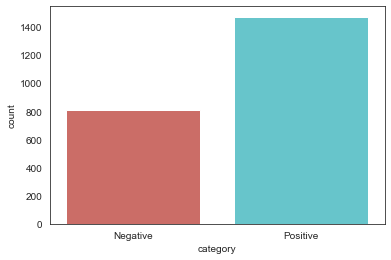

In [101]:
#Visualizing the data
sns.countplot(x='category',data=data,palette='hls')
plt.show()

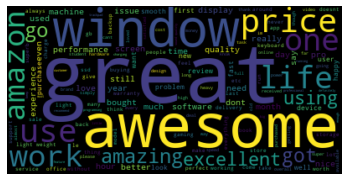

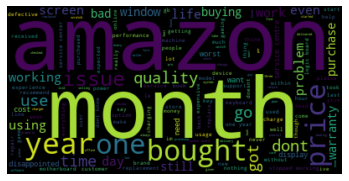

In [102]:
#Word-Cloud Visualization

positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

## ===============================================